## Handling Missing Values in Large-scale ML Pipelines:

**Task 1**: Impute with Mean or Median
- Step 1: Load a dataset with missing values (e.g., Boston Housing dataset).
- Step 2: Identify columns with missing values.
- Step 3: Impute missing values using the mean or median of the respective columns.

In [6]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=feature_names)
df['MEDV'] = target
df.iloc[[5, 10, 15], 0] = np.nan
df.iloc[[20, 25], 5] = np.nan
missing_cols = df.columns[df.isnull().any()].tolist()
mean_imputer = SimpleImputer(strategy='mean')
if 'CRIM' in missing_cols:
    df['CRIM_imputed'] = mean_imputer.fit_transform(df[['CRIM']])
if 'RM' in missing_cols:
    df['RM_imputed'] = mean_imputer.fit_transform(df[['RM']])
X = df[['CRIM_imputed' if 'CRIM' in missing_cols else 'CRIM', 'RM_imputed' if 'RM' in missing_cols else 'RM']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on the test set: {mse:.2f}")


Mean Squared Error on the test set: 41.97


**Task 2**: Impute with the Most Frequent Value
- Step 1: Use the Titanic dataset and identify columns with missing values.
- Step 2: Impute categorical columns using the most frequent value.

In [7]:
# write your code from here
import pandas as pd
from sklearn.impute import SimpleImputer

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
missing_cols = df.columns[df.isnull().any()].tolist()
categorical_cols_with_missing = df[missing_cols].select_dtypes(include=['object']).columns.tolist()
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
for col in categorical_cols_with_missing:
    df[col + '_imputed'] = most_frequent_imputer.fit_transform(df[[col]]).flatten()
print(df[['Embarked', 'Embarked_imputed', 'Cabin', 'Cabin_imputed']].head())

  Embarked Embarked_imputed Cabin Cabin_imputed
0        S                S   NaN       B96 B98
1        C                C   C85           C85
2        S                S   NaN       B96 B98
3        S                S  C123          C123
4        S                S   NaN       B96 B98


**Task 3**: Advanced Imputation - k-Nearest Neighbors
- Step 1: Implement KNN imputation using the KNNImputer from sklearn.
- Step 2: Explore how KNN imputation improves data completion over simpler methods.

In [8]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.iloc[[5, 10, 15], 0] = np.nan
df.iloc[[20, 25], 5] = np.nan
missing_cols = df.columns[df.isnull().any()].tolist()
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
mean_imputer = SimpleImputer(strategy='mean')
X_train_mean_imputed = mean_imputer.fit_transform(X_train_scaled)
X_test_mean_imputed = mean_imputer.transform(X_test_scaled)
knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn_imputed = knn_imputer.fit_transform(X_train_scaled)
X_test_knn_imputed = knn_imputer.transform(X_test_scaled)
mean_model = LinearRegression()
mean_model.fit(X_train_mean_imputed, y_train)
mean_pred = mean_model.predict(X_test_mean_imputed)
mean_mse = mean_squared_error(y_test, mean_pred)
knn_model = LinearRegression()
knn_model.fit(X_train_knn_imputed, y_train)
knn_pred = knn_model.predict(X_test_knn_imputed)
knn_mse = mean_squared_error(y_test, knn_pred)
print(f"Mean Imputation MSE: {mean_mse:.2f}")
print(f"KNN Imputation MSE: {knn_mse:.2f}")

Mean Imputation MSE: 0.56
KNN Imputation MSE: 0.56


## Feature Scaling & Normalization Best Practices:

**Task 1**: Standardization
- Step 1: Standardize features using StandardScaler.
- Step 2: Observe how standardization affects data distribution.

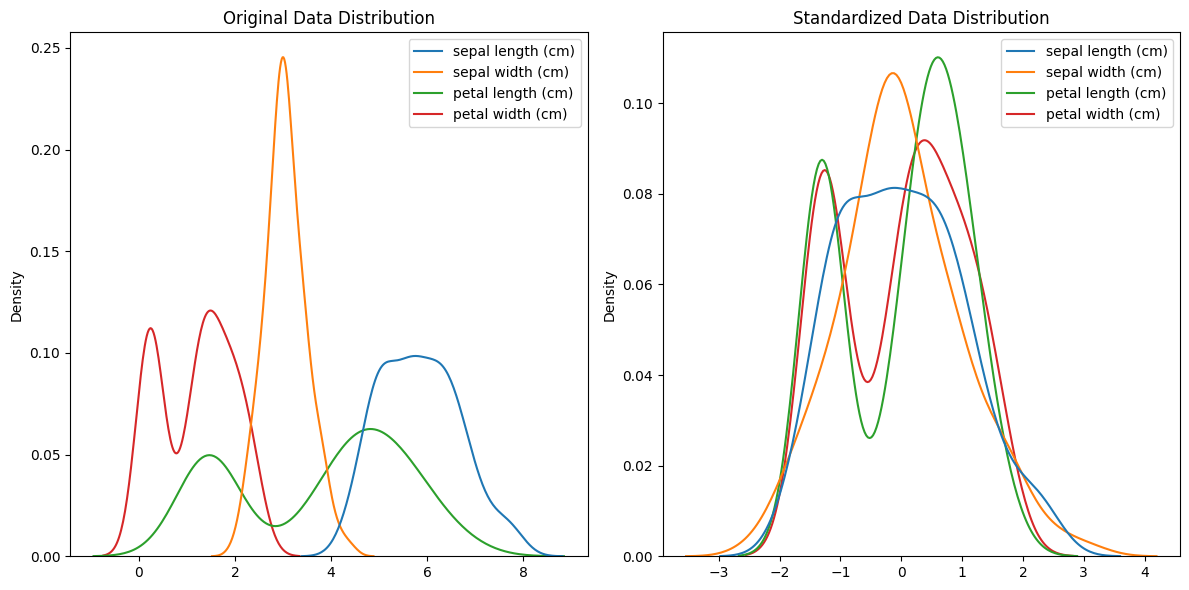

Original Data Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Standardized Data Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e

In [9]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris(as_frame=True)
df = iris.frame
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[iris.feature_names])
scaled_df = pd.DataFrame(scaled_features, columns=iris.feature_names)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df[iris.feature_names])
plt.title('Original Data Distribution')
plt.subplot(1, 2, 2)
sns.kdeplot(data=scaled_df)
plt.title('Standardized Data Distribution')
plt.tight_layout()
plt.show()
print("Original Data Statistics:")
print(df[iris.feature_names].describe())
print("\nStandardized Data Statistics:")
print(scaled_df.describe())

**Task 2**: Min-Max Scaling

- Step 1: Scale features to lie between 0 and 1 using MinMaxScaler.
- Step 2: Compare with standardization.

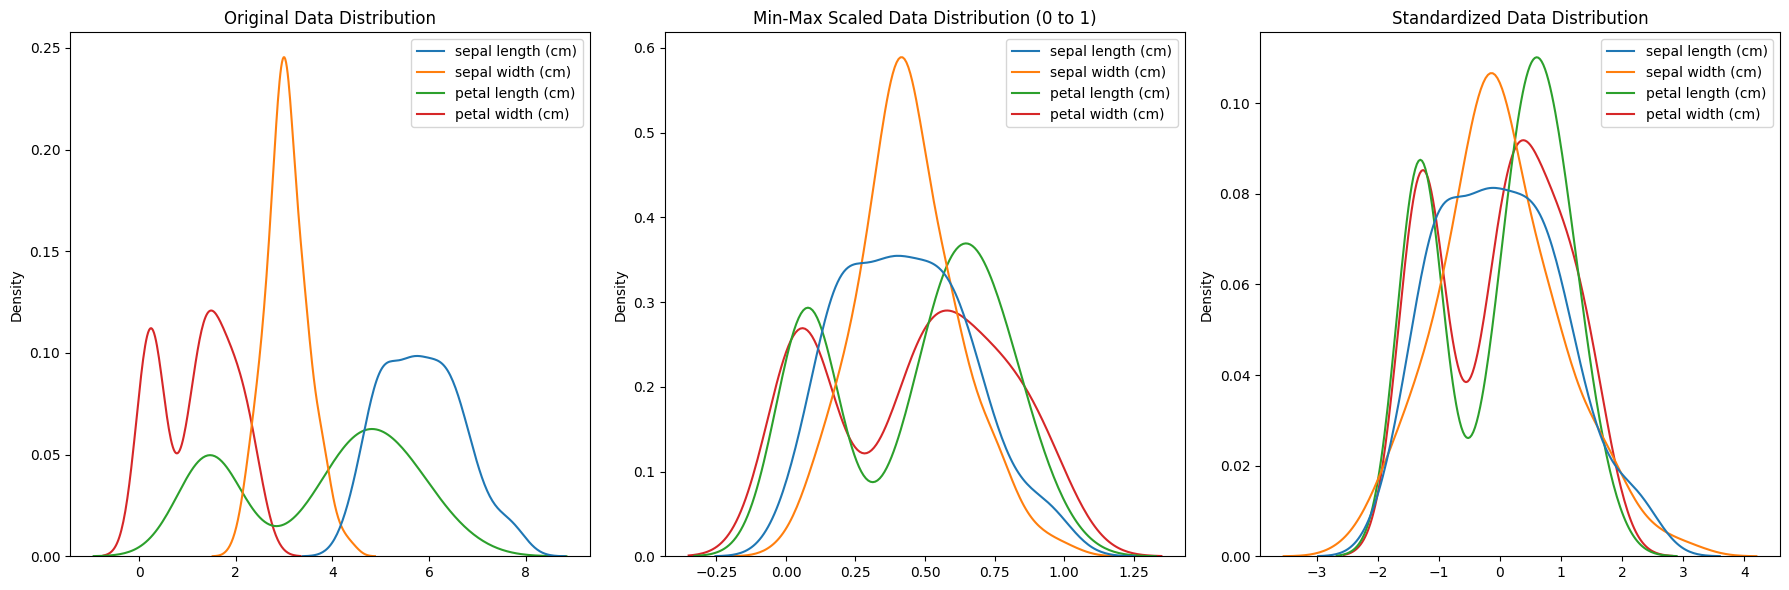

Original Data Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  

Min-Max Scaled Data Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.0

In [10]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler

iris = load_iris(as_frame=True)
df = iris.frame
min_max_scaler = MinMaxScaler()
min_max_scaled_features = min_max_scaler.fit_transform(df[iris.feature_names])
min_max_scaled_df = pd.DataFrame(min_max_scaled_features, columns=iris.feature_names)
standard_scaler = StandardScaler()
standard_scaled_features = standard_scaler.fit_transform(df[iris.feature_names])
standard_scaled_df = pd.DataFrame(standard_scaled_features, columns=iris.feature_names)
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.kdeplot(data=df[iris.feature_names])
plt.title('Original Data Distribution')
plt.subplot(1, 3, 2)
sns.kdeplot(data=min_max_scaled_df)
plt.title('Min-Max Scaled Data Distribution (0 to 1)')
plt.subplot(1, 3, 3)
sns.kdeplot(data=standard_scaled_df)
plt.title('Standardized Data Distribution')
plt.tight_layout()
plt.show()
print("Original Data Statistics:")
print(df[iris.feature_names].describe())
print("\nMin-Max Scaled Data Statistics:")
print(min_max_scaled_df.describe())
print("\nStandardized Data Statistics:")
print(standard_scaled_df.describe())

**Task 3**: Robust Scaling
- Step 1: Scale features using RobustScaler, which is useful for data with outliers.
- Step 2: Assess changes in data scaling compared to other scaling methods.

/tmp/ipykernel_54651/2828138023.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HouseAge_outlier'] = df['HouseAge'].apply(lambda x: 100 if x > 60 else x)


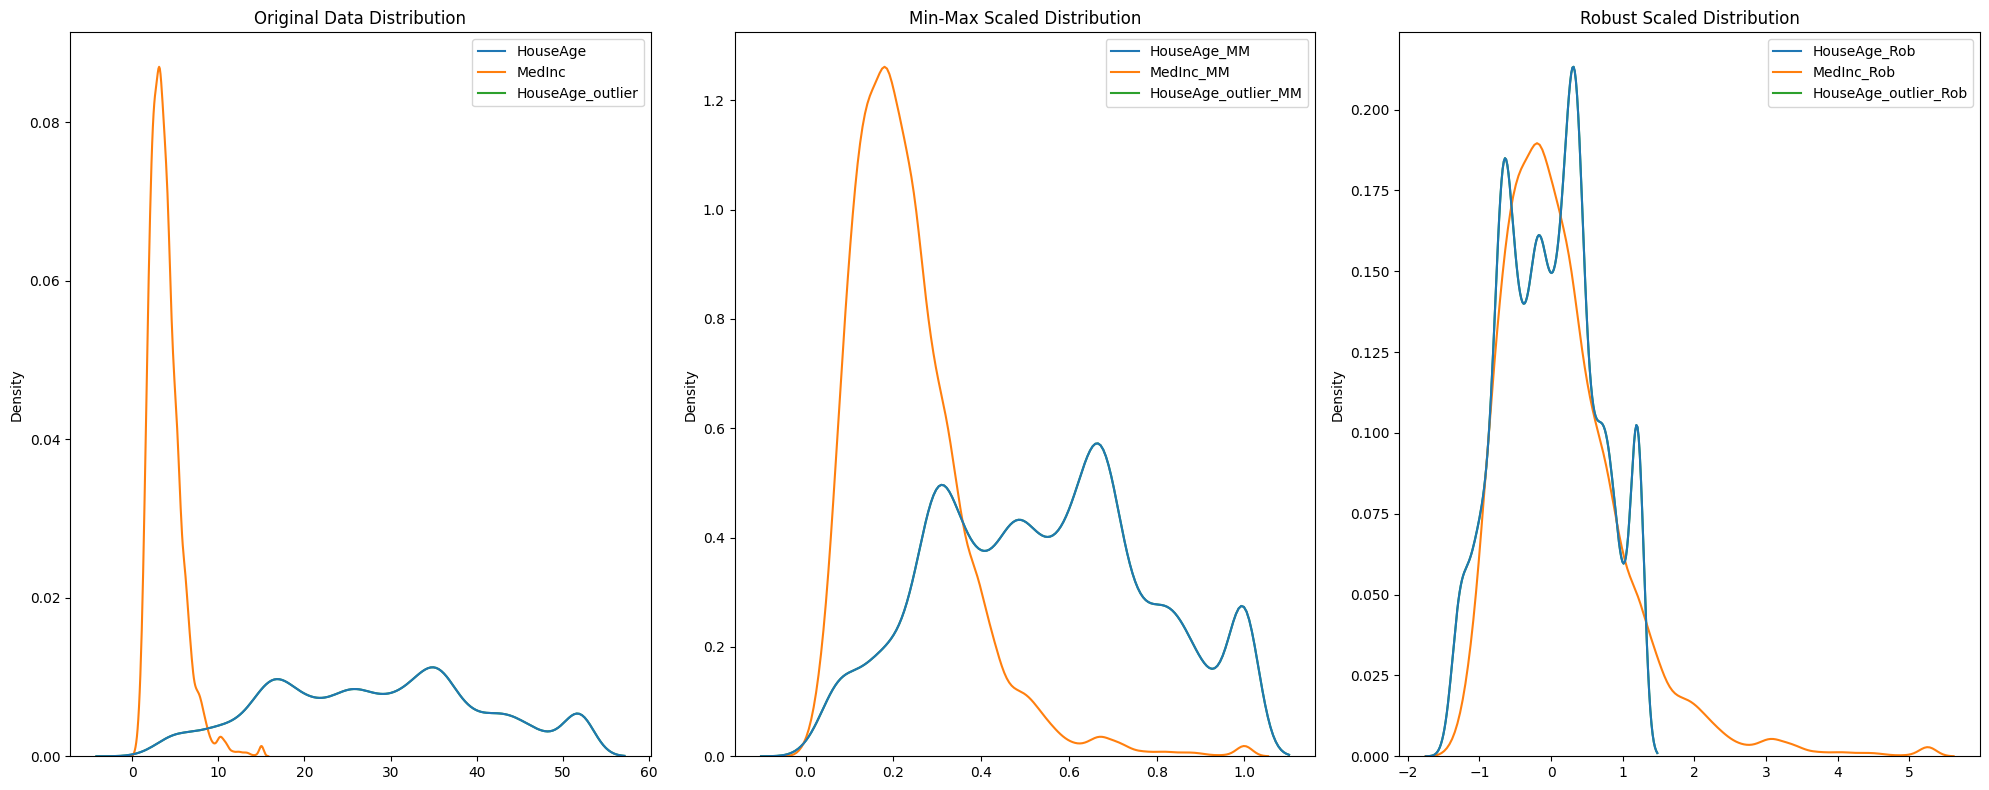

Original Data Statistics:
           HouseAge        MedInc  HouseAge_outlier
count  20640.000000  20640.000000      20640.000000
mean      28.639486      3.870671         28.639486
std       12.585558      1.899822         12.585558
min        1.000000      0.499900          1.000000
25%       18.000000      2.563400         18.000000
50%       29.000000      3.534800         29.000000
75%       37.000000      4.743250         37.000000
max       52.000000     15.000100         52.000000

Min-Max Scaled Data Statistics:
        HouseAge_MM     MedInc_MM  HouseAge_outlier_MM
count  20640.000000  20640.000000         20640.000000
mean       0.541951      0.232464             0.541951
std        0.246776      0.131020             0.246776
min        0.000000      0.000000             0.000000
25%        0.333333      0.142308             0.333333
50%        0.549020      0.209301             0.549020
75%        0.705882      0.292641             0.705882
max        1.000000      1.000000

In [11]:
# write your code from here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

housing = fetch_california_housing(as_frame=True)
df = housing.frame[['HouseAge', 'MedInc']]
df['HouseAge_outlier'] = df['HouseAge'].apply(lambda x: 100 if x > 60 else x)
min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(df)
standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(df)
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(df)
scaled_df = pd.DataFrame(np.hstack([min_max_scaled, standard_scaled, robust_scaled]),
                         columns=['HouseAge_MM', 'MedInc_MM', 'HouseAge_outlier_MM',
                                  'HouseAge_Std', 'MedInc_Std', 'HouseAge_outlier_Std',
                                  'HouseAge_Rob', 'MedInc_Rob', 'HouseAge_outlier_Rob'])
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.kdeplot(data=df)
plt.title('Original Data Distribution')
plt.subplot(1, 3, 2)
sns.kdeplot(data=scaled_df[['HouseAge_MM', 'MedInc_MM', 'HouseAge_outlier_MM']])
plt.title('Min-Max Scaled Distribution')
plt.subplot(1, 3, 3)
sns.kdeplot(data=scaled_df[['HouseAge_Rob', 'MedInc_Rob', 'HouseAge_outlier_Rob']])
plt.title('Robust Scaled Distribution')
plt.tight_layout()
plt.show()
print("Original Data Statistics:")
print(df.describe())
print("\nMin-Max Scaled Data Statistics:")
print(scaled_df[['HouseAge_MM', 'MedInc_MM', 'HouseAge_outlier_MM']].describe())
print("\nStandard Scaled Data Statistics:")
print(scaled_df[['HouseAge_Std', 'MedInc_Std', 'HouseAge_outlier_Std']].describe())
print("\nRobust Scaled Data Statistics:")
print(scaled_df[['HouseAge_Rob', 'MedInc_Rob', 'HouseAge_outlier_Rob']].describe())

## Feature Selection Techniques:
### Removing Highly Correlated Features:

**Task 1**: Correlation Matrix
- Step 1: Compute correlation matrix.
- Step 2: Remove highly correlated features (correlation > 0.9).

In [12]:
# write your code from here
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = pd.DataFrame(data, columns=feature_names)
correlation_matrix = df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
highly_correlated_features = [column for column in upper.columns if any(upper[column] > 0.9)]
df_uncorrelated = df.drop(columns=highly_correlated_features)
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing highly correlated features:", df_uncorrelated.shape)
print("\nHighly correlated features removed:", highly_correlated_features)
print("\nCorrelation matrix of the remaining features:")
print(df_uncorrelated.corr())

Original DataFrame shape: (506, 13)
DataFrame shape after removing highly correlated features: (506, 12)

Highly correlated features removed: ['TAX']

Correlation matrix of the remaining features:
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456

### Using Mutual Information & Variance Thresholds:

**Task 2**: Mutual Information
- Step 1: Compute mutual information between features and target.
- Step 2: Retain features with high mutual information scores.

In [13]:
# write your code from here
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import mutual_info_regression

housing = fetch_california_housing(as_frame=True)
df = housing.frame
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
mutual_info = mutual_info_regression(X, y)
mutual_info_series = pd.Series(mutual_info, index=X.columns)
sorted_mutual_info = mutual_info_series.sort_values(ascending=False)
print("Mutual Information Scores:")
print(sorted_mutual_info)
top_k = 5
selected_features_mi = sorted_mutual_info.head(top_k).index.tolist()
X_selected_mi = X[selected_features_mi]
print(f"\nTop {top_k} features based on mutual information: {selected_features_mi}")
print("\nSelected features DataFrame:")
print(X_selected_mi.head())

Mutual Information Scores:
Longitude     0.401527
MedInc        0.387586
Latitude      0.369994
AveRooms      0.103154
AveOccup      0.072800
HouseAge      0.031889
AveBedrms     0.024004
Population    0.021507
dtype: float64

Top 5 features based on mutual information: ['Longitude', 'MedInc', 'Latitude', 'AveRooms', 'AveOccup']

Selected features DataFrame:
   Longitude  MedInc  Latitude  AveRooms  AveOccup
0    -122.23  8.3252     37.88  6.984127  2.555556
1    -122.22  8.3014     37.86  6.238137  2.109842
2    -122.24  7.2574     37.85  8.288136  2.802260
3    -122.25  5.6431     37.85  5.817352  2.547945
4    -122.25  3.8462     37.85  6.281853  2.181467


**Task 3**: Variance Threshold
- Step 1: Implement VarianceThreshold to remove features with low variance.
- Step 2: Analyze impact on feature space.

In [ ]:
# write your code from here
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import VarianceThreshold

housing = fetch_california_housing(as_frame=True)
df = housing.frame.drop('MedHouseVal', axis=1)
selector = VarianceThreshold(threshold=1.0)
selector.fit(df)
low_variance_features = df.columns[~selector.get_support()]
df_high_variance = df[df.columns[selector.get_support()]]
print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing low variance features:", df_high_variance.shape)
print("\nLow variance features removed:", list(low_variance_features))
print("\nDataFrame with high variance features:")
print(df_high_variance.head())